<div Style="text-align: center;line-height: 30px;font-size:32px;font-weight: bold"> Detector de fitolitos</div>
***
La predicción de una nueva imagen lleva consigo un gran número de cálculos. Por lo que se ruega paciencia en la espera del resultado. Además, cada nueva predicción se añade a continuación de la anterior.

In [121]:
%%html
<style type="text/css">

div.output_png {
  display: flex;
  justify-content: center;
}

</style>

In [122]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox
import ipywidgets as widgets

import numpy as np

from skimage import io as sio
from skimage.transform import rescale

import io as io
import pickle

import PIL.Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from IPython.display import display

import fileupload
import os
import re

from Phytoliths_Classifier.recognition import Phytoliths_Recognition

In [123]:
path = '../rsc/obj/'
cls_path = path + 'cls.sav'
cluster_path = path + 'cluster.sav'

recog = Phytoliths_Recognition(cls_path=cls_path,cluster_path=cluster_path)
# Inicialización de probabilidades requeridas para las cajas
required_probs_factor = 0.995
overlap_factor = 0.3
rescale_factor = 0.5
image = None

In [124]:
def imageConverter(image):
    """Función que se encarga de aplicar
    las operaciones necesarias para convertir
    los datos obtenidos del FileUpload en una
    imagen."""
    image = io.BytesIO(image)
    image = np.array(PIL.Image.open(image))
    return image

In [125]:
def patch_size_selector(height, width):
    """Función mediante la que seleccionamos
    el tamaño de la ventana."""
    recog.set_patch_size(height, width)

In [126]:
def step_size_selector(step_size_h, step_size_v):
    """Función mediante la que seleccionamos
    el tamaño del salto de una ventana a 
    otra."""
    recog.set_step_size(step_size_h, step_size_v)

In [127]:
def probabilities_selector(probs):
    """Función mediante la que seleccionamos
    las probabilidades de acierto que debe
    tener una predicción para ser 
    seleccionada.
    """
    required_probs_factor = probs

In [128]:
def overlap_selector(overlap_factor):
    """Función mediante la que seleccionamos el
    indice de solapamiento utilizado por
    non-maximum supression"""
    overlap_factor = overlap_factor

In [129]:
def rescale_selector(rescale_factor):
    """Función mediante la que seleccionamos el
    indice de solapamiento utilizado por
    non-maximum supression"""
    rescale_factor = rescale_factor

In [130]:
_upload_widget = fileupload.FileUploadWidget()
pattern = re.compile("^.*\.(jpeg|jpg|tif|tiff|png)$", re.IGNORECASE)

def _cb(change):
    """Función mediante la que escogemos 
    la imagen.
    """
    global image
    change = change['owner']
    if pattern.match(change.filename):
        # Obtenemos imagen
        image = imageConverter(change.data)
    else:
        image = None
    
upload_widget = fileupload.FileUploadWidget()
upload_widget.observe(_cb, names='data')

In [131]:
clf_button = widgets.Button(description="Reconocer")

def on_button_clicked(b):
    plt.clf()
    global image
    # Predecimos imagen
    if image is None:
        print("Seleccione una imagen, por favor.", end="\r")
        return
    print("", end="\r")
    boxes = recog.predict_sliding_window_nms(image,
                                             required_probs_factor,
                                             rescale_factor,
                                             overlap_factor)
    # Mostramos imagen
    rescaled_image = rescale(image, rescale_factor)
    recog.plot(rescaled_image,boxes)

clf_button.on_click(on_button_clicked)

In [132]:
# Permitimos escoger el reescalado de la imagen, por defecto 0.5
a = interactive(rescale_selector, 
         rescale_factor=widgets.FloatSlider(description='Reescalado', min=0.1, max=1, step=0.1, value=0.5))

# Permitimos escoger el tamaño de alto y ancho para
# las subdivisiones de la ventana
b = interactive(patch_size_selector, 
         height=widgets.IntSlider(description='Altura de la ventana', min=50, max=400, step=10, value=150),
         width=widgets.IntSlider(description='Ancho de la ventana', min=50, max=400, step=10, value=150))

# Permitimos escoger el tamaño del salto
# en las subdivisiones de la imagen
c = interactive(step_size_selector, 
         step_size_h=widgets.IntSlider(description='Salto horizontal', min=5, max=200, step=10, value=40),
         step_size_v=widgets.IntSlider(description='Salto vertical', min=5, max=200, step=10, value=40))

d = interactive(overlap_selector, 
         overlap_factor=widgets.FloatSlider(description='Factor de solapamiento', min=0.1, max=1, step=0.1, value=0.3))

# Por ultimo, mostramos la imagen y permitimos que muestre las ventanas 
# en función de las probabilidades
e = interactive(probabilities_selector, probs=widgets.FloatSlider(description='Probabilidades fitolito', min=0.1, max=1, step=0.1, value=0.99))

In [133]:
recog_box = HBox(
    (VBox((a,b)),VBox((c,d)),VBox((e,upload_widget, clf_button)))
)

In [134]:
# Style
upload_widget.margin = '4% 15% 5% 30%'
clf_button.margin = '0% 15% 5% 18%'
recog_box.layout.padding = '0% 0% 0% 7%'

Ventanas a procesar  609


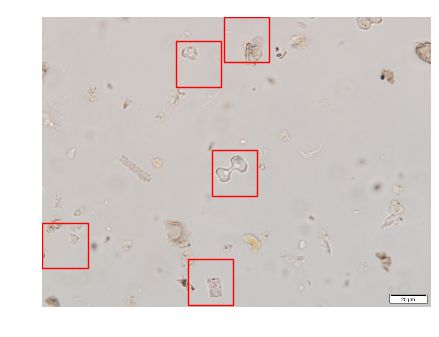

In [135]:
recog_box